<a href="https://colab.research.google.com/github/BurhanUlHaqq/ResearchWork/blob/main/RW_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import pandas as pd

url = 'https://raw.githubusercontent.com/BurhanUlHaqq/ResearchWork/main/data/DatasetFinal.csv'
data = pd.read_csv(url, sep=',', header=0)
data.head()

,Sentiments,Positive
0,sai kha ya her kisi kay bus ki bat nhi hai lak...,1
1,sahi bt h,1
2,kya bt hai,1
3,wah je wah,1
4,are wha kaya bat hai,1


Saperate Data and target cols

In [23]:
sentiments, lable = data.Sentiments, data.Positive
print(sentiments[2],' ',lable[2])

kya bt hai   1


In [24]:
from sklearn.model_selection import train_test_split
sentiment_train,sentiment_test,lable_train,label_test=train_test_split(sentiments,lable,test_size=0.2,random_state=123)
# train data
print(f"The shape of training data is {sentiment_train.shape}.")
print(sentiment_train.head())
# test data
print(f"The shape of testing data is {sentiment_test.shape}.")
print(sentiment_test.head())

The shape of training data is (9037,).
5620    halan ke mohammed ali jinnah aur mohammed ali ...
6991                    boht acha product he thanks daraz
7283    kal sy patani kia hua hua ha ny forward msges ...
2123    behtreen jesi yeh shirts yahan dikhai gai hain...
7869                                           haar maani
Name: Sentiments, dtype: object
The shape of testing data is (2260,).
2656    meri umar is waqat saal hai aur mere pas abhi ...
6467                           tu bhi ro single hai tu bi
3966    yahan react krnay ki baat hori hai bibi or sbs...
10      ya mere rab tu bra kreem hy is mulk k halat pr...
304          uncle aunty ko meri trf se topon ki salamiii
Name: Sentiments, dtype: object


In [25]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
vect = CountVectorizer()
tf_train=vect.fit_transform(sentiment_train)  #train the vectorizer, build the vocablury
tf_test=vect.transform(sentiment_test)  #get same encodings on test data as of vocabulary built

In [26]:
tf_sentiment_test=vect.transform(sentiment_test)


In [27]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X=tf_train,y=lable_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [28]:
expected = label_test
predicted=model.predict(tf_test)

In [29]:
from sklearn import metrics

print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))



              precision    recall  f1-score   support

           0       0.73      0.76      0.75      1013
           1       0.80      0.78      0.79      1247

    accuracy                           0.77      2260
   macro avg       0.77      0.77      0.77      2260
weighted avg       0.77      0.77      0.77      2260

[[769 244]
 [279 968]]


(<Figure size 432x288 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f160c4fd4d0>)

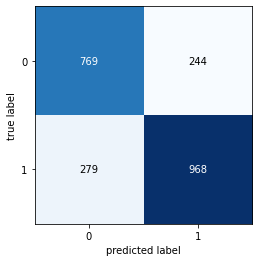

In [30]:
from mlxtend.plotting import plot_confusion_matrix

plot_confusion_matrix(metrics.confusion_matrix(expected, predicted))